In [ ]:
# require imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, f1_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz
import seaborn as sns

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image

%matplotlib inline

In [ ]:
# ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/UNTHSC/Supervised_Learning/Student_Tester/Final_Colab_Programs/



/content/drive/MyDrive/UNTHSC/Supervised_Learning/Student_Tester/Final_Colab_Programs


In [ ]:
!pwd

/content/drive/MyDrive/UNTHSC/Supervised_Learning/Student_Tester/Final_Colab_Programs


In [ ]:
# loading and reading the dataset
df = pd.read_csv('diabetes.csv')

In [ ]:
# head of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# shape of the data
df.shape

(768, 9)

In [ ]:
# checking for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# distribution of Outcome variable
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [ ]:
# descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# # let's consider only 3 independent variables with target variable
# df = df[['Age', 'BloodPressure', 'BMI', 'Outcome']]

In [ ]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
# extracting dependent and independent variable
y = df['Outcome']
X = df.drop(columns=['Outcome'], axis=1)

In [ ]:
# train/test split of the data

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=47)

# the OOB (Out of bag is same as test data set; but then it changes every time, we resample (bootrap)) is 25% of samples

In [ ]:
# shape of train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

### **Random Forest Classifier**

In [ ]:
# Random Forest (RF) model fitting
rf_clf = RandomForestClassifier(n_estimators=200, criterion='entropy')
rf_clf = rf_clf.fit(X_train, y_train)

In [ ]:
print('The training accuracy of the model: ', round(accuracy_score(y_train, rf_clf.predict(X_train)), 4))
print('The training recall of the model: ', round(recall_score(y_train, rf_clf.predict(X_train)), 4))
print('The training precision of the model: ', round(precision_score(y_train, rf_clf.predict(X_train)), 4))
print('The training f1_score of the model: ', round(f1_score(y_train, rf_clf.predict(X_train)), 4))

The training accuracy of the model:  1.0
The training recall of the model:  1.0
The training precision of the model:  1.0
The training f1_score of the model:  1.0


In [ ]:
print('The test accuracy of the model: ', round(accuracy_score(y_test, rf_clf.predict(X_test)), 4))
print('The test recall of the model: ', round(recall_score(y_test, rf_clf.predict(X_test)), 4))
print('The test precision of the model: ', round(precision_score(y_test, rf_clf.predict(X_test)), 4))
print('The test f1_score of the model: ', round(f1_score(y_test, rf_clf.predict(X_test)), 4))

The test accuracy of the model:  0.7552
The test recall of the model:  0.5231
The test precision of the model:  0.68
The test f1_score of the model:  0.5913


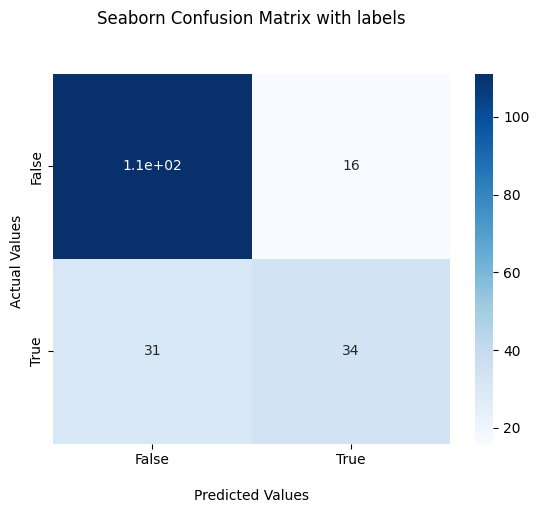

In [ ]:

y_pred = rf_clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

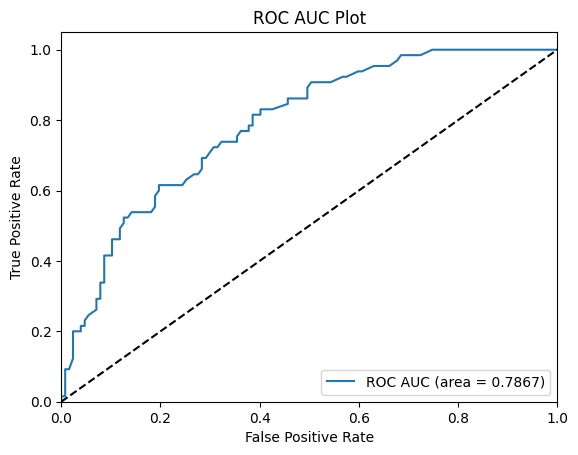

In [ ]:
# Calculate ROC AUC score
y_prob = [probs[1] for probs in rf_clf.predict_proba(X_test)]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC AUC (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

#### **Hyper-Parameter Tuning for Random Forest Classifier**

In [ ]:
## Hyperparameter tuning ranges
n_estimators_tune = [100, 200, 300, 400]
max_depth_tune = [2, 4]
max_features_tune = ['sqrt', 'log2']
min_samples_leaf_tune = [1, 2, 4]
min_samples_split_tune = [2, 5, 10]

In [ ]:
#################################
## Cross-validation and tuning ##
##           ROUND 1           ##
#################################
## Set cross-validation and defaults
cv = 5

## Setting grid
#param_grid_1 = dict(n_estimators=n_estimators_tune, max_depth=max_depth_tune)

param_grid_1 = {'n_estimators' : n_estimators_tune,
                'max_depth': max_depth_tune,
                 'criterion': ['entropy']
               }

# Create a Random Forest Classifier object
rfc = RandomForestClassifier(random_state=42)

## Optimal params of model
optimal_params_1=GridSearchCV(
    estimator=rfc,
    param_grid=param_grid_1,
    scoring='f1_macro',
    cv=cv
  )

## Fitting model
start_time = time.time()
optimal_params_1.fit(X_train, y_train)

print("My program took", (time.time() - start_time)/60, "to run")
print("n_estimators: ",optimal_params_1.best_params_['n_estimators'])
print("max_depth: ", optimal_params_1.best_params_['max_depth'])

My program took 0.35934495528539023 to run
n_estimators:  200
max_depth:  4


In [ ]:
#-----------------------------------------------------#
#                  Summarize Results                  #
#-----------------------------------------------------#
print("Best: %f using %s" % (optimal_params_1.best_score_, optimal_params_1.best_params_))
means = optimal_params_1.cv_results_['mean_test_score']
stds = optimal_params_1.cv_results_['std_test_score']
params = optimal_params_1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.733903 using {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 200}
0.695248 (0.026092) with: {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 100}
0.684909 (0.027082) with: {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 200}
0.697333 (0.030581) with: {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 300}
0.694143 (0.025489) with: {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 400}
0.733308 (0.022335) with: {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 100}
0.733903 (0.014291) with: {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 200}
0.727947 (0.011681) with: {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 300}
0.731610 (0.009252) with: {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 400}


In [ ]:
#------------------------------------------------------#
#                  Evaluating Round 1                  #
#------------------------------------------------------#
y_train_pred1 = optimal_params_1.best_estimator_.predict(X_train)
y_test_pred1 = optimal_params_1.best_estimator_.predict(X_test)
print('Random Forest Classifier evaluating result:\n')

print("Train Accuracy:  ", round(accuracy_score(y_train, y_train_pred1), 4))
print("Train RECALL: ", round(recall_score(y_train, y_train_pred1), 4))
print("Train PRECISION:   ", round(precision_score(y_train, y_train_pred1), 4))
print("Train F1-Score:   ", round(f1_score(y_train, y_train_pred1), 4))
print('\n')
print("Test Accuracy:  ", round(accuracy_score(y_test, y_test_pred1), 4))
print("Test RECALL: ", round(recall_score(y_test, y_test_pred1), 4))
print("Test PRECISION:   ", round(precision_score(y_test, y_test_pred1), 4))
print("Test F1-Score:   ", round(f1_score(y_test, y_test_pred1), 4))

Random Forest Classifier evaluating result:

Train Accuracy:   0.8351
Train RECALL:  0.6749
Train PRECISION:    0.8253
Train F1-Score:    0.7425


Test Accuracy:   0.7448
Test RECALL:  0.4615
Test PRECISION:    0.6818
Test F1-Score:    0.5505


In [ ]:
#################################
##           ROUND 2           ##
#################################
max_depth = optimal_params_1.best_params_['max_depth']
n_estimators = optimal_params_1.best_params_['n_estimators']

param_grid_2 = {'max_depth'   :[max_depth],
                'n_estimators'    :[n_estimators],
                'criterion': ['entropy'],
                'max_features'       : max_features_tune,
                'min_samples_leaf': min_samples_leaf_tune,
                'min_samples_split': min_samples_split_tune
               }

# Create a Random Forest Classifier object
rfc = RandomForestClassifier(random_state=42)

## Optimal params of model
optimal_params_2=GridSearchCV(
    estimator=rfc,
    param_grid=param_grid_2,
    scoring='f1_macro',
    cv=cv
  )

## Fitting model
start_time = time.time()
optimal_params_2.fit(X_train, y_train)

print("My program took", (time.time() - start_time)/60, "to run")
print("max_features: ", optimal_params_2.best_params_['max_features'])
print("min_samples_leaf: ",optimal_params_2.best_params_['min_samples_leaf'])
print("min_samples_split: ",optimal_params_2.best_params_['min_samples_split'])

My program took 0.6543457388877869 to run
max_features:  sqrt
min_samples_leaf:  2
min_samples_split:  2


In [ ]:
#-----------------------------------------------------#
#                  Summarize Results                  #
#-----------------------------------------------------#
print("Best: %f using %s" % (optimal_params_2.best_score_, optimal_params_2.best_params_))
means = optimal_params_2.cv_results_['mean_test_score']
stds = optimal_params_2.cv_results_['std_test_score']
params = optimal_params_2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.740299 using {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
0.733903 (0.014291) with: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
0.736394 (0.011065) with: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
0.727957 (0.014349) with: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
0.740299 (0.010936) with: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
0.739645 (0.008762) with: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
0.724723 (0.007245) with: {'criterion': 'entropy',

In [ ]:
#------------------------------------------------------#
#                  Evaluating Round 2                  #
#------------------------------------------------------#
y_train_pred2 = optimal_params_2.best_estimator_.predict(X_train)
y_test_pred2 = optimal_params_2.best_estimator_.predict(X_test)
print('Random Forest Classifier evaluating result:\n')

print("Train Accuracy:  ", round(accuracy_score(y_train, y_train_pred2), 4))
print("Train RECALL: ", round(recall_score(y_train, y_train_pred2), 4))
print("Train PRECISION:   ", round(precision_score(y_train, y_train_pred2), 4))
print("Train F1-Score:   ", round(f1_score(y_train, y_train_pred2), 4))
print('\n')
print("Test Accuracy:  ", round(accuracy_score(y_test, y_test_pred2), 4))
print("Test RECALL: ", round(recall_score(y_test, y_test_pred2), 4))
print("Test PRECISION:   ", round(precision_score(y_test, y_test_pred2), 4))
print("Test F1-Score:   ", round(f1_score(y_test, y_test_pred2), 4))

Random Forest Classifier evaluating result:

Train Accuracy:   0.8351
Train RECALL:  0.6798
Train PRECISION:    0.8214
Train F1-Score:    0.7439


Test Accuracy:   0.7448
Test RECALL:  0.4615
Test PRECISION:    0.6818
Test F1-Score:    0.5505


In [ ]:
###################################
##           FULL MODEL          ##
###################################

max_features = optimal_params_2.best_params_['max_features']
min_samples_leaf = optimal_params_2.best_params_['min_samples_leaf']
min_samples_split = optimal_params_2.best_params_['min_samples_split']

# Create the Final Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=n_estimators,
                             max_depth=max_depth,
                             criterion='entropy',
                             max_features=max_features,
                             min_samples_leaf=min_samples_leaf,
                             min_samples_split=min_samples_split,
                             random_state=42)

start_time = time.time()
rfc.fit(X_train, y_train)
print("My program took", (time.time() - start_time)/60, "to run")

My program took 0.008481303850809732 to run


In [ ]:
print('The training accuracy of the model: ', round(accuracy_score(y_train, rfc.predict(X_train)), 4))
print('The training recall of the model: ', round(recall_score(y_train, rfc.predict(X_train)), 4))
print('The training precision of the model: ', round(precision_score(y_train, rfc.predict(X_train)), 4))
print('The training f1_score of the model: ', round(f1_score(y_train, rfc.predict(X_train)), 4))

The training accuracy of the model:  0.8351
The training recall of the model:  0.6798
The training precision of the model:  0.8214
The training f1_score of the model:  0.7439


In [ ]:
print('The test accuracy of the model: ', round(accuracy_score(y_test, rfc.predict(X_test)), 4))
print('The test recall of the model: ', round(recall_score(y_test, rfc.predict(X_test)), 4))
print('The test precision of the model: ', round(precision_score(y_test, rfc.predict(X_test)), 4))
print('The test f1_score of the model: ', round(f1_score(y_test, rfc.predict(X_test)), 4))

The test accuracy of the model:  0.7448
The test recall of the model:  0.4615
The test precision of the model:  0.6818
The test f1_score of the model:  0.5505


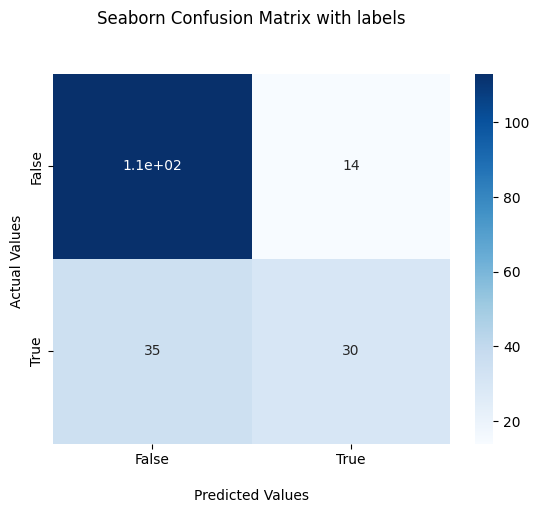

In [ ]:

y_pred = rfc.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

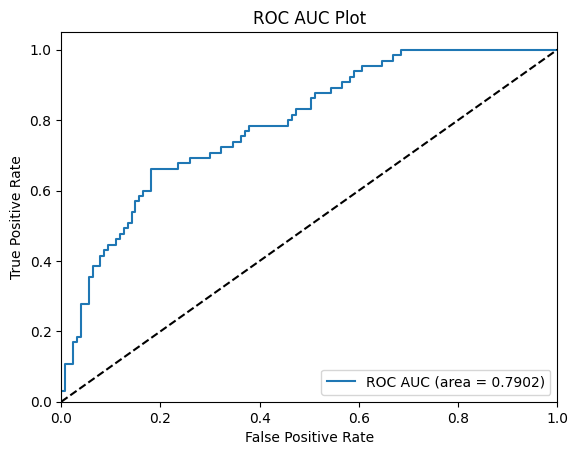

In [ ]:
# Calculate ROC AUC score
y_prob = [probs[1] for probs in rfc.predict_proba(X_test)]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label='ROC AUC (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Plot')
plt.legend(loc="lower right")
plt.show()

#### **Top and Bottom 3 Trees of Random Forest**

In [ ]:
# Compute the accuracy of each individual tree in the forest
accuracies = [tree.score(X_test, y_test) for tree in rfc.estimators_]
accuracies[:5]

[0.7395833333333334,
 0.6666666666666666,
 0.7135416666666666,
 0.6458333333333334,
 0.65625]

In [ ]:
# Get the indices of the top 3 and bottom 3 trees based on accuracy
indices = np.argsort(accuracies)[::-1] # sort in descending order to get the top trees first
top_3 = indices[:3]
bottom_3 = indices[-3:]

In [ ]:
top_3

array([10, 23, 39])

In [ ]:
bottom_3

array([183, 130,  37])

In [ ]:
# Get the top 5 and bottom 5 trees
top_3_trees = [rfc.estimators_[i] for i in top_3]
bottom_3_trees = [rfc.estimators_[i] for i in bottom_3]

In [ ]:
top_3_trees

[DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                        min_samples_leaf=2, random_state=669991378),
 DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                        min_samples_leaf=2, random_state=953477463),
 DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                        min_samples_leaf=2, random_state=106406362)]

In [ ]:
top_3_trees[0].feature_importances_

array([0.        , 0.37405266, 0.        , 0.03242465, 0.0539967 ,
       0.1870796 , 0.08795417, 0.26449222])

In [ ]:
top_3_trees[1].feature_importances_

array([0.00880072, 0.52321235, 0.        , 0.        , 0.06067293,
       0.2055615 , 0.02518259, 0.17656991])

In [ ]:
# Below code will give top 3 and bottom 3 trees from random forest

# Plot the top 3 trees
for i, tree in enumerate(top_3_trees):
    dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)
    graph = graphviz.Source(dot_data)
    graph.render("top_3_tree_{}".format(i))

# Plot the bottom 3 trees
for i, tree in enumerate(bottom_3_trees):
    dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)
    graph = graphviz.Source(dot_data)
    graph.render("bottom_3_tree_{}".format(i))

VISUALIZATION OF THE TOP TREE:


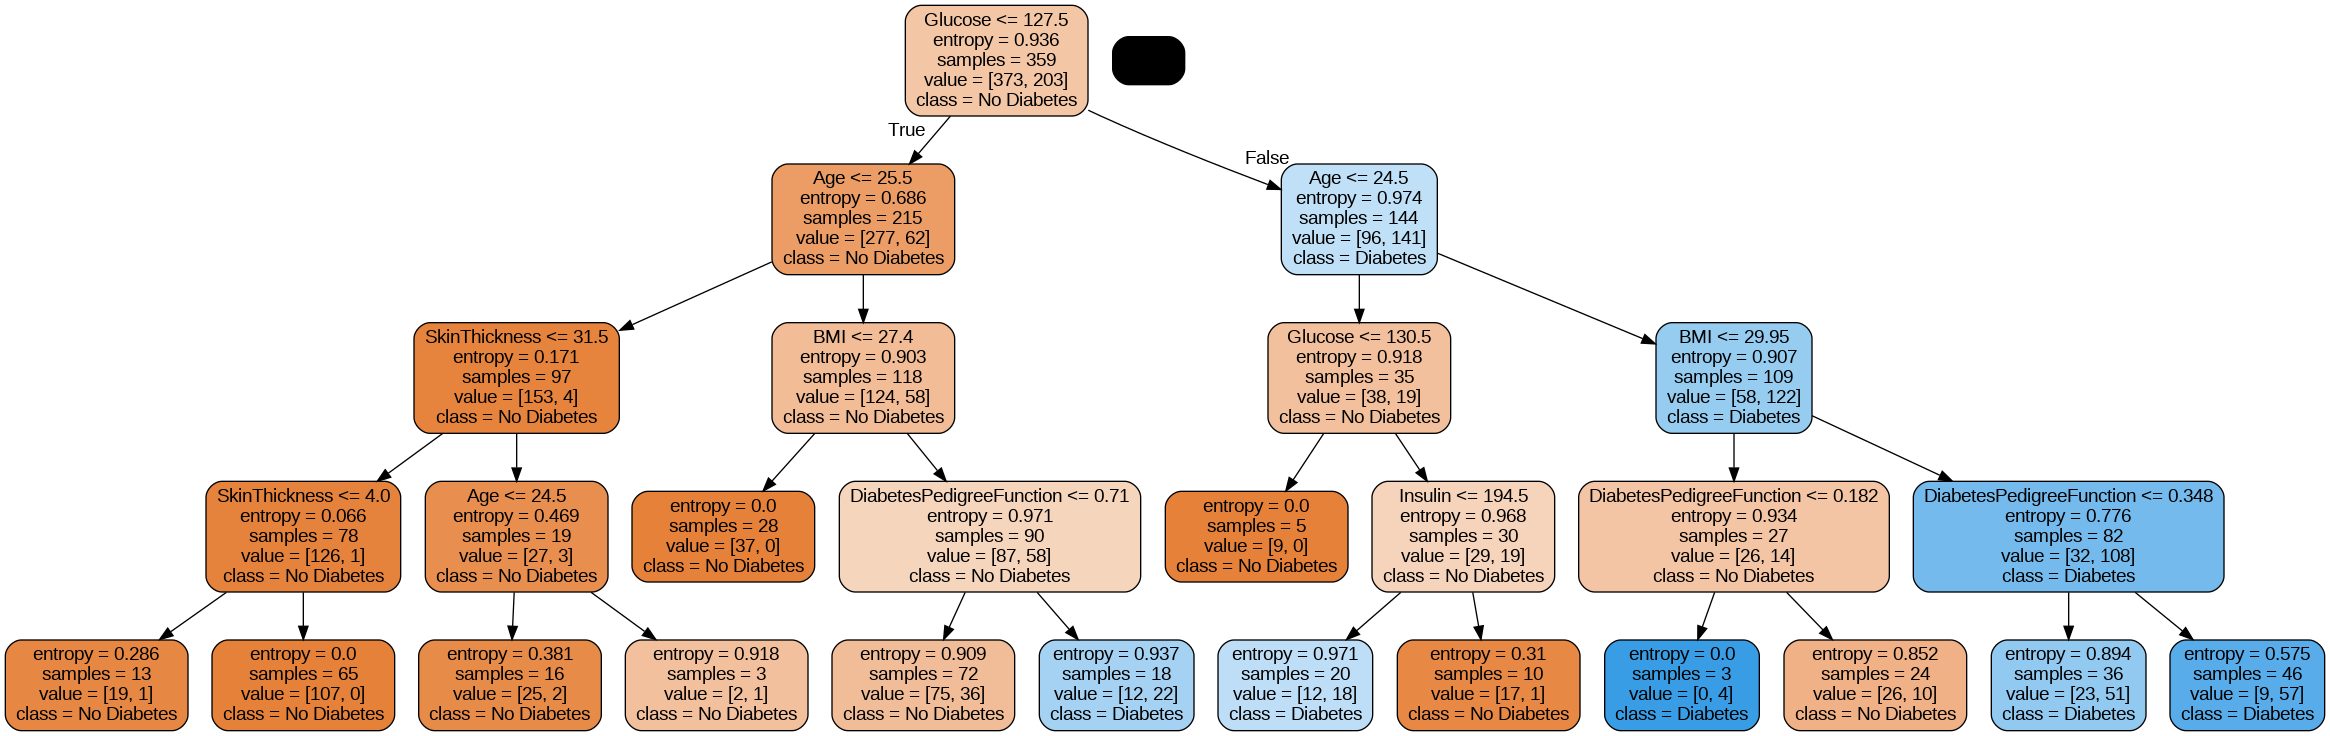

In [ ]:
# Here is visualization of the top tree from random forest RF classifier
dot_data = export_graphviz(top_3_trees[0], out_file=None, feature_names=X.columns,
                           class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)

print("VISUALIZATION OF THE TOP TREE:")

# plot the top tree from RF using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)

# display the top tree
Image(graph.create_png())

VISUALIZATION OF THE SECOND TOP TREE:


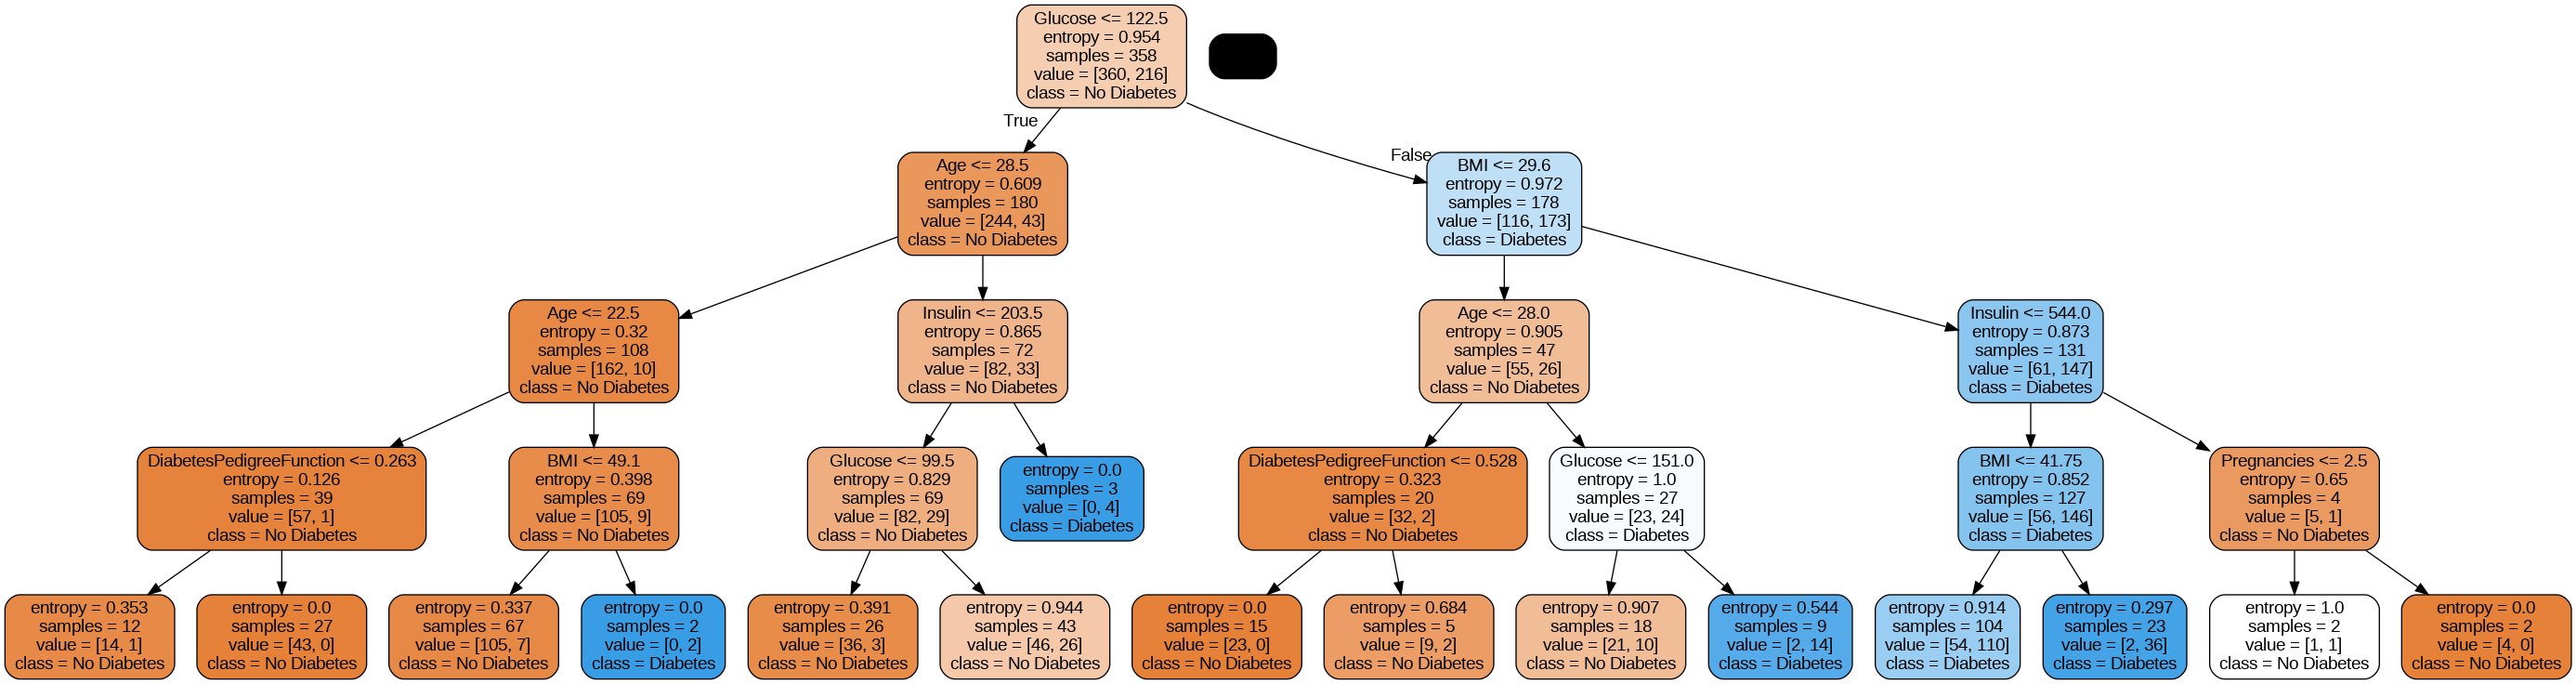

In [ ]:
# Here is visualization of the second top tree from random forest (RF) classifier
dot_data = export_graphviz(top_3_trees[1], out_file=None, feature_names=X.columns,
                           class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)

print("VISUALIZATION OF THE SECOND TOP TREE:")

# plot the top tree from RF using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)

# display the top tree
Image(graph.create_png())

VISUALIZATION OF THE BOTTOM TREE:


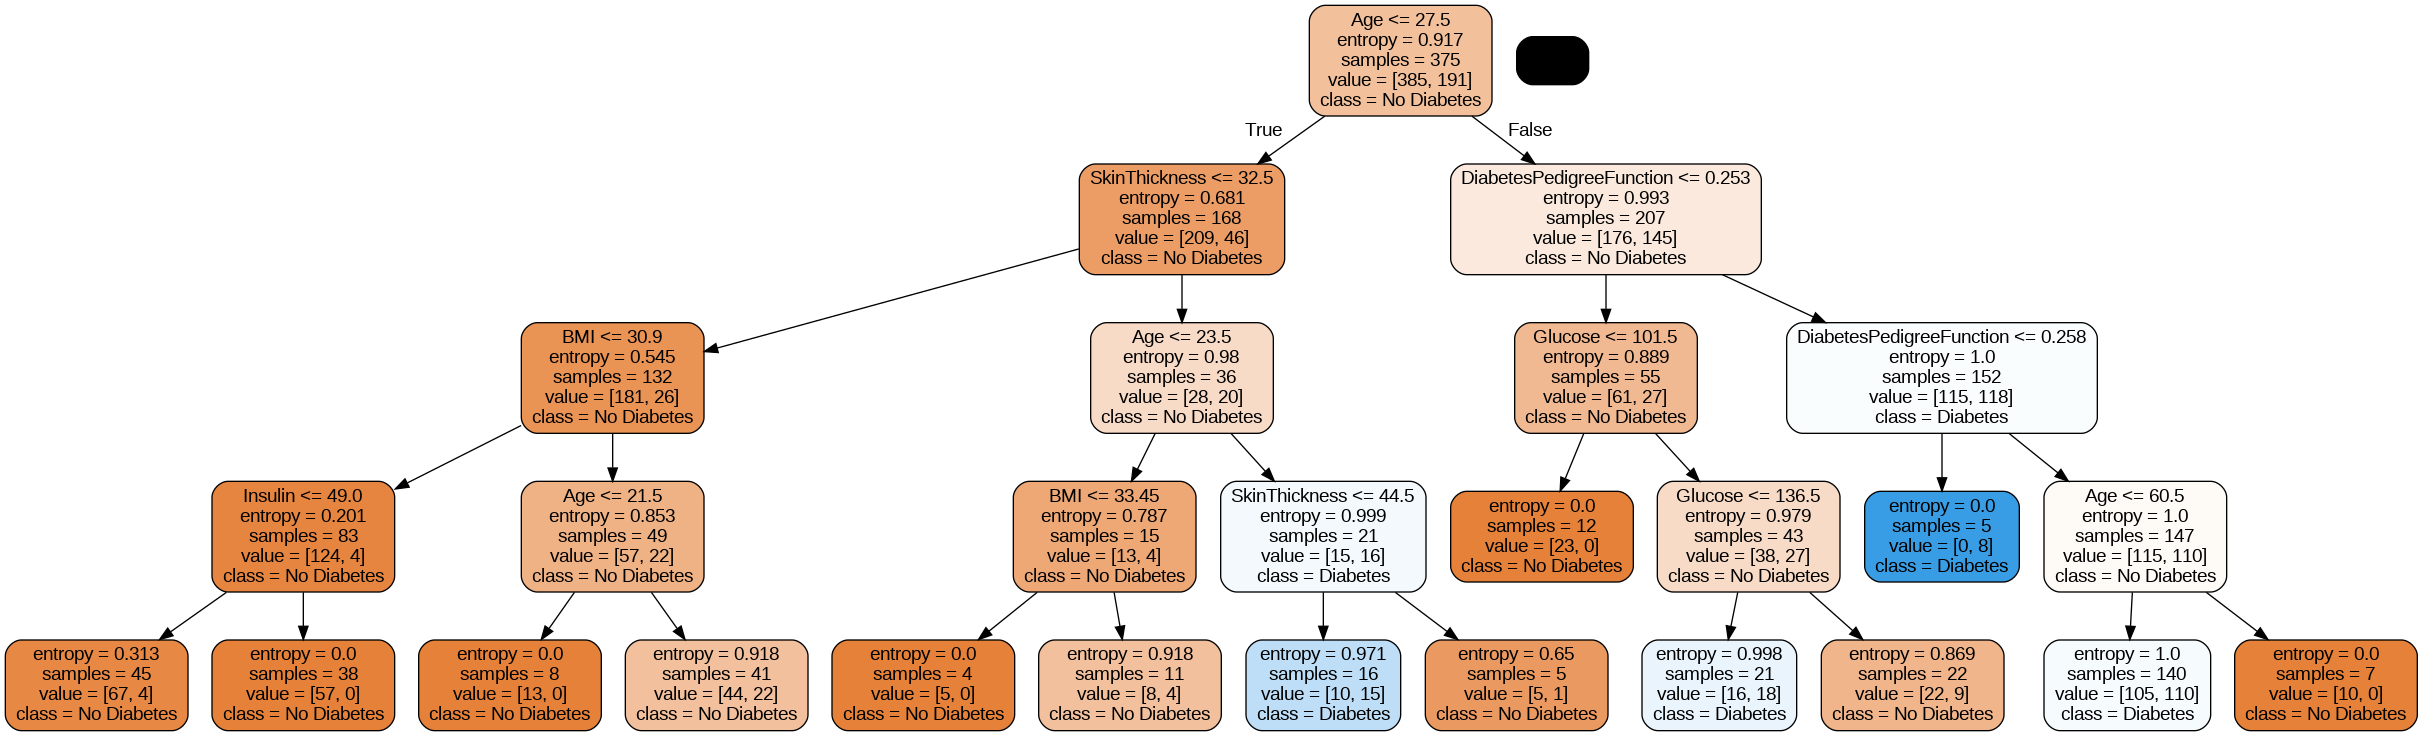

In [ ]:
# Here is visualization of the bottom tree from random forest (RF) classifier
dot_data = export_graphviz(bottom_3_trees[0], out_file=None, feature_names=X.columns,
                           class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)

print("VISUALIZATION OF THE BOTTOM TREE:")

# plot the top tree from RF using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)

# display the top tree
Image(graph.create_png())

VISUALIZATION OF THE SECOND BOTTOM TREE:


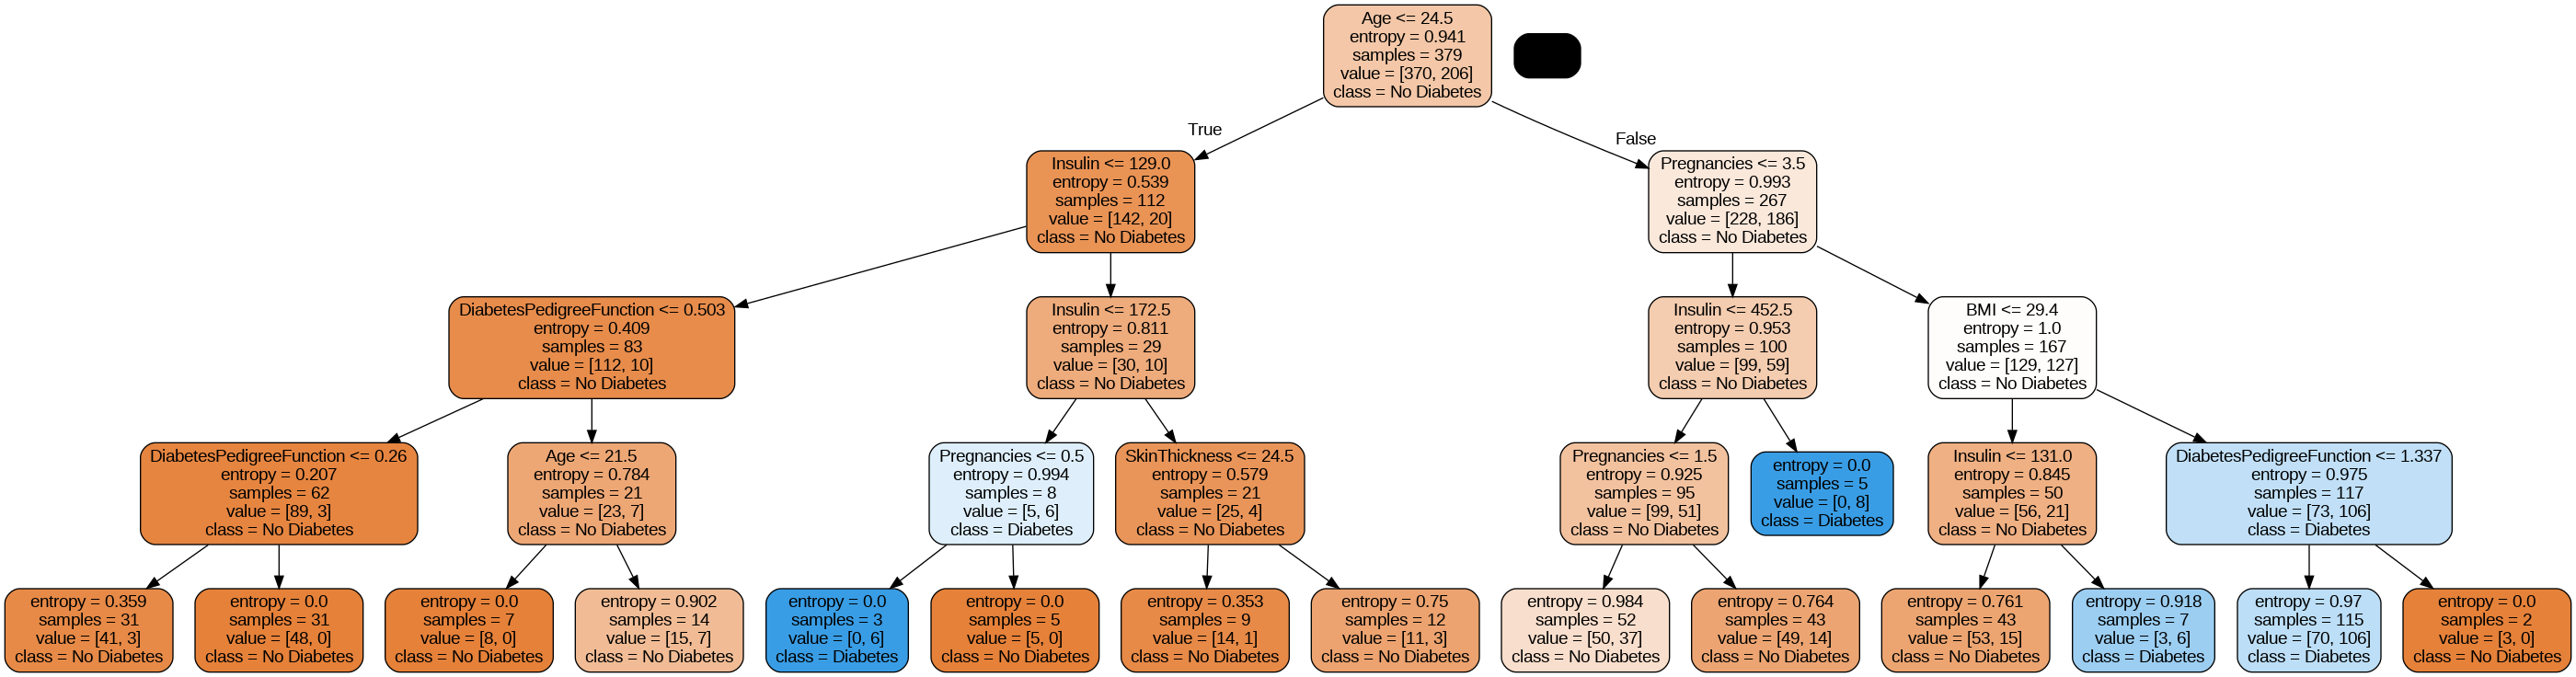

In [ ]:
# Here is visualization of the second bottom tree from random forest (RF) classifier
dot_data = export_graphviz(bottom_3_trees[1], out_file=None, feature_names=X.columns,
                           class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)

print("VISUALIZATION OF THE SECOND BOTTOM TREE:")

# plot the top tree from RF using DOT format in 'dot_data'
graph = pydotplus.graph_from_dot_data(dot_data)

# display the top tree
Image(graph.create_png())

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
feature_names = [f"feature {i}" for i in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 4.493 seconds


In [ ]:
feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

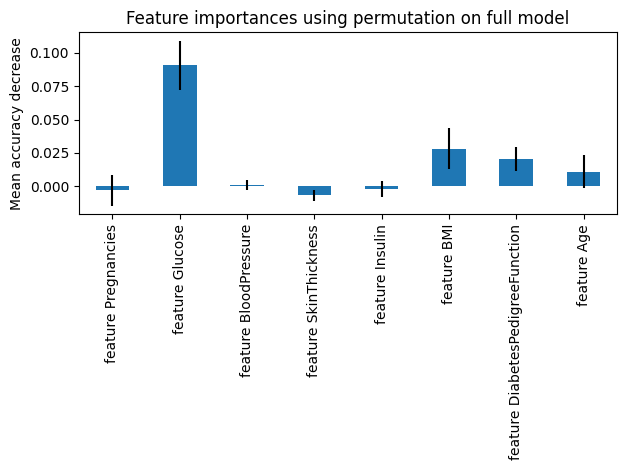

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

#### The computation for full permutation importance is more costly. Features are shuffled n times
#### and the model refitted to estimate the importance of it.
#### Please see Permutation feature importance for more details. We can now plot the importance ranking.

#### For details on feature importance permutation methods, see https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance